# Bridging Simplicity and Sophistication using GLinear: A Novel Architecture for Enhanced Time Series Prediction (https://arxiv.org/pdf/2501.01087)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate synthetic sequence data
def generate_data(seq_len=30, horizon=5, num_samples=1000):
    X, y = [], []
    for _ in range(num_samples):
        start = np.random.rand() * 2 * np.pi
        freq = np.random.rand() * 0.5 + 0.1
        series = np.sin(np.linspace(start, start + freq * (seq_len + horizon), seq_len + horizon))
        X.append(series[:seq_len])
        y.append(series[seq_len:])
    return np.array(X), np.array(y)

In [4]:
# Prepare data
seq_len, horizon = 30, 5
X, y = generate_data(seq_len, horizon)
X_train, X_val = torch.tensor(X[:800], dtype=torch.float32), torch.tensor(X[800:], dtype=torch.float32)
y_train, y_val = torch.tensor(y[:800], dtype=torch.float32), torch.tensor(y[800:], dtype=torch.float32)

In [5]:
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32)

In [6]:
# Define GLinear-inspired block
class GLinearNet(nn.Module):
    def __init__(self, seq_len, horizon):
        super(GLinearNet, self).__init__()
        self.linear = nn.Linear(seq_len, horizon)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.linear(self.relu(x))

In [7]:
model = GLinearNet(seq_len, horizon)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:

# Training loop
train_losses, val_losses = [], []
for epoch in range(5):
    model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            preds = model(xb)
            val_loss += criterion(preds, yb).item()
    val_losses.append(val_loss / len(val_loader))
    print(f"Epoch {epoch+1}: Train Loss = {train_losses[-1]:.4f}, Val Loss = {val_losses[-1]:.4f}")


Epoch 1: Train Loss = 0.5010, Val Loss = 0.5008
Epoch 2: Train Loss = 0.4595, Val Loss = 0.4672
Epoch 3: Train Loss = 0.4287, Val Loss = 0.4418
Epoch 4: Train Loss = 0.4054, Val Loss = 0.4243
Epoch 5: Train Loss = 0.3869, Val Loss = 0.4083


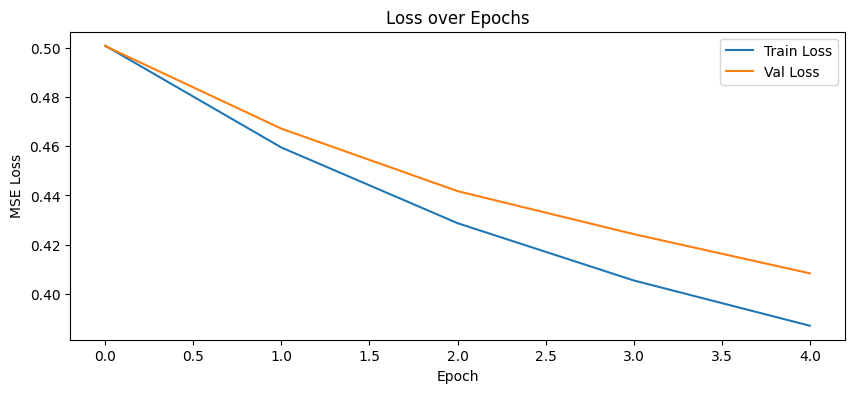

In [9]:
# Plot loss curves
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


In [10]:
# Visualize predictions
model.eval()
with torch.no_grad():
    preds = model(X_val[:10]).numpy()

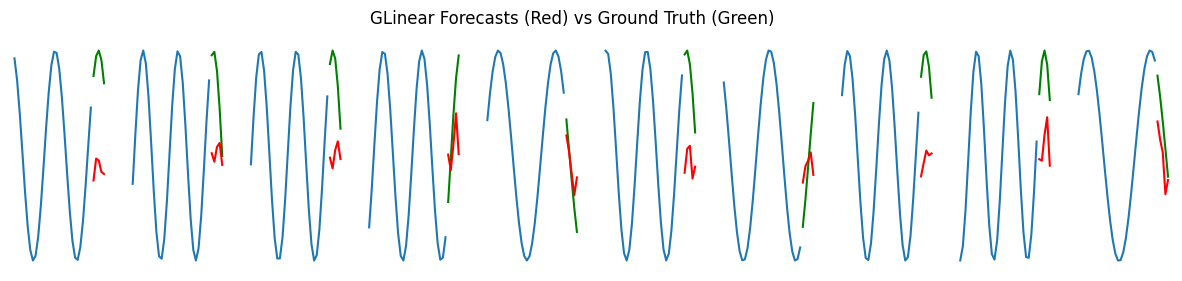

In [11]:
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.plot(range(seq_len), X_val[i].numpy(), label='Input')
    plt.plot(range(seq_len, seq_len + horizon), y_val[i].numpy(), label='True', color='green')
    plt.plot(range(seq_len, seq_len + horizon), preds[i], label='Pred', color='red')
    plt.axis('off')
plt.suptitle('GLinear Forecasts (Red) vs Ground Truth (Green)')
plt.show()
